In [3]:
from fktools import *
import tensorflow as tf

from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeVigoV2

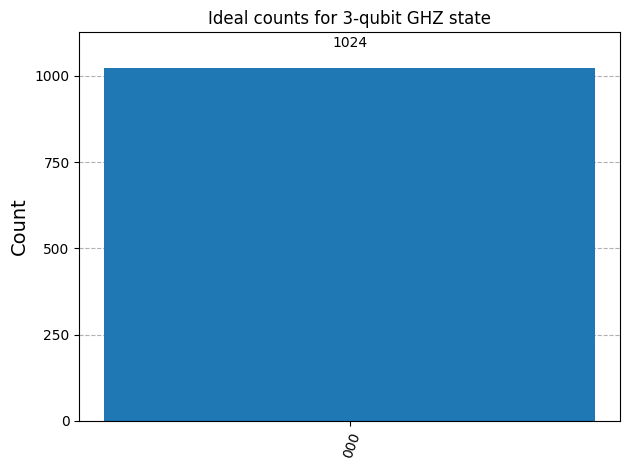

In [6]:
circ = QuantumCircuit(3, 3)
# circ.h(0)
# circ.cx(0, 1)
# circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

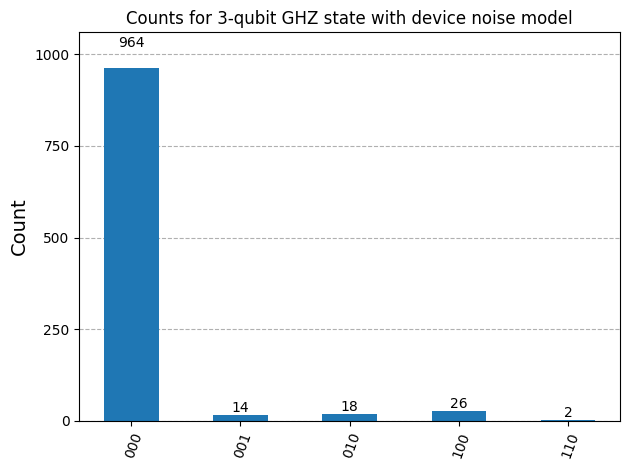

In [7]:

device_backend = FakeVigoV2()
sim_vigo = AerSimulator.from_backend(device_backend)

tcirc = transpile(circ, sim_vigo)

result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ state with device noise model")